# C1 Millikan's oil-drop experiment
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/12/21

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import glob,os

In [2]:
d = 5e-3
eta = 1.83e-5
b = 6.17e-6
l = 1.6e-3

g = 9.78858
rho = 981
p = 76

e = 1.60217733e-19


# q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*t*rho*g))**(1/2)))))**(3/2) * (1/(u*t**(3/2)))
# q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*ts*rho*g))**(1/2)))))**(3/2) * (1/(us*ts**(3/2)))
# q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*t2*rho*g))**(1/2)))))**(3/2) * (1/u) * (1/t1+1/t2)*(1/t2)**(1/2)
# q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*t2s*rho*g))**(1/2)))))**(3/2) * (1/u) * (1/t1s+1/t2s)*(1/t2s)**(1/2)

## Static

In [3]:
############# Import data ############
dfLIST = []
path = r'C1-Data/'
file = glob.glob(os.path.join(path, 'Sta**.csv'))
for f in file:
    dfLIST.append(pd.read_csv(f))
    
############# Define Function ############  
def F(df,idx):
    # mean & std of each measurements
    t, u = tuple(df.describe().loc['mean'])
    St, Su = tuple(df.describe().loc['std'])
    q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*t*rho*g))**(1/2)))))**(3/2) * (1/(u*t**(3/2)))
    # Diff
    ts, us = sp.symbols('ts us') 
    F_q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*ts*rho*g))**(1/2)))))**(3/2) * (1/(us*ts**(3/2)))
    subs = {'ts':t, 'us':u} 
    F_q_t, F_q_u = tuple(sp.diff(F_q, i).evalf(subs = subs) for i in ['ts', 'us'])  

    # S
    Sa = ( (St*F_q_t)**2 + (Su*F_q_u)**2 )**(1/2)
    sbt = 0.01/(3**(1/2)) 
    sbu = 1/(3**(1/2)) 
    Sb = ( (sbt*F_q_t)**2 + (sbu*F_q_u)**2 )**(1/2)
    S = ( (Sa)**2 + (Sb)**2 )**(1/2)

    # output
    return (t, u, q, Sa, Sb, S)

############# Execution ############
para_table = pd.DataFrame(columns=['t', 'u', 'q', 'Sa', 'Sb', 'S'])
for idx in range(len(dfLIST)):
    df = dfLIST[idx]
    t, u, q, Sa, Sb, S = F(df, idx)
    para_table = para_table.append(pd.DataFrame({'t':t, 'u':u, 'q':q, 'Sa':Sa, 'Sb':Sb, 'S':S}, index=[idx]))
para_table

,t,u,q,Sa,Sb,S
0,17.240,270.6,4.630935e-19,1.02402855484078e-20,1.01733595556916e-21,1.02906958248421e-20
1,17.322,262.6,4.736761e-19,1.21908246591899e-20,1.07024552584623e-21,1.22377134856437e-20
2,30.552,334.2,1.525748e-19,2.22216771433710e-21,2.67494909700535e-22,2.23820974829390e-21
3,22.494,129.2,6.393746e-19,4.35848831540184e-21,2.86874736834671e-21,5.21786660033491e-21
4,31.514,156.0,3.112220e-19,4.37446501666761e-21,1.15534838590557e-21,4.52446395442193e-21


In [4]:
para_table['n'] = para_table['q']/e
para_table['round_n'] = round(para_table['n'])
para_table

,t,u,q,Sa,Sb,S,n,round_n
0,17.240,270.6,4.630935e-19,1.02402855484078e-20,1.01733595556916e-21,1.02906958248421e-20,2.890401,3.0
1,17.322,262.6,4.736761e-19,1.21908246591899e-20,1.07024552584623e-21,1.22377134856437e-20,2.956453,3.0
2,30.552,334.2,1.525748e-19,2.22216771433710e-21,2.67494909700535e-22,2.23820974829390e-21,0.952297,1.0
3,22.494,129.2,6.393746e-19,4.35848831540184e-21,2.86874736834671e-21,5.21786660033491e-21,3.990661,4.0
4,31.514,156.0,3.112220e-19,4.37446501666761e-21,1.15534838590557e-21,4.52446395442193e-21,1.942494,2.0


0.007018291067803758


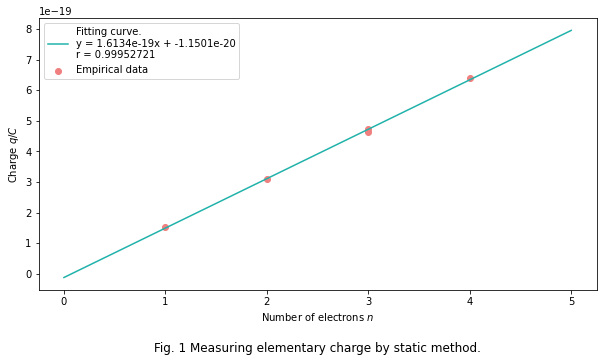

In [5]:
fig = plt.figure(figsize=(10, 5))
e_func = np.polyfit(para_table['round_n'], para_table['q'], deg=1)

n_dns = np.linspace(0, 5, 100)
q_reg = np.polyval(e_func, n_dns)

r = np.corrcoef(para_table['round_n'], para_table['q'])[0,1]

A1, A2 = tuple(e_func)
plt.scatter(para_table['round_n'], para_table['q'], color='lightcoral', label='Empirical data')
plt.plot(n_dns, q_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4e}x + {:.4e}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()

plt.xlabel('Number of electrons $n$')
plt.ylabel('Charge $q/C$')
plt.title('Fig. 1 Measuring elementary charge by static method.', y=-0.25)
plt.savefig(r'C1-Output\fig.1.png', bbox_inches = 'tight', dpi=300)
print((A1-e)/e)

## Dynamic

In [3]:
############# Import data ############
dfLIST = []
path = r'C1-Data/'
file = glob.glob(os.path.join(path, 'Dyn**.csv'))
for f in file:
    dfLIST.append(pd.read_csv(f))
    
############# Define Function ############  
def F(df,idx):
    # mean & std of each measurements
    t1, t2 = tuple(df.describe().loc['mean'])
    St1, St2 = tuple(df.describe().loc['std'])
    q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*t2*rho*g))**(1/2)))))**(3/2) * (1/u) * (1/t1+1/t2)*(1/t2)**(1/2)
    
    # Diff
    t1s, t2s = sp.symbols('t1s t2s') 
    F_q = (18*np.pi/(2*rho*g)**(1/2)) *d* ((eta*l)/(1+(b/(p*((9*eta*l)/(2*t2s*rho*g))**(1/2)))))**(3/2) * (1/u) * (1/t1s+1/t2s)*(1/t2s)**(1/2) 
    subs = {'t1s':t1, 't2s':t2} 
    F_q_t1, F_q_t2 = tuple(sp.diff(F_q, i).evalf(subs = subs) for i in ['t1s', 't2s'])  

    # S
    Sa = ( (St1*F_q_t1)**2 + (St2*F_q_t2)**2 )**(1/2)
    sbt = 0.01/(3**(1/2)) 
    Sb = ( (sbt*F_q_t1)**2 + (sbt*F_q_t2)**2 )**(1/2)
    S = ( (Sa)**2 + (Sb)**2 )**(1/2)

    # output
    return (t1, t2, q, Sa, Sb, S)

############# Execution ############
para_table = pd.DataFrame(columns=['t1', 't2', 'q', 'Sa', 'Sb', 'S'])
U_list = [196, 250, 300, 356, 150]
for idx in range(len(dfLIST)):
    df = dfLIST[idx]
    u = U_list[idx]
    t1, t2, q, Sa, Sb, S = F(df, idx)
    para_table = para_table.append(pd.DataFrame({'t1':t1, 't2':t2, 'q':q, 'Sa':Sa, 'Sb':Sb, 'S':S}, index=[idx]))
para_table

,t1,t2,q,Sa,Sb,S
0,12.400,30.610,8.996607e-19,1.80009535073251e-20,3.32626452276865e-22,1.80040264254870e-20
1,11.238,30.286,7.641230e-19,1.58345725608124e-20,3.12026743070103e-22,1.58376465698671e-20
2,28.530,23.662,4.652123e-19,1.59427083978936e-20,1.33986506020498e-22,1.59432714159944e-20
3,10.592,21.522,7.540527e-19,1.03036479684590e-20,3.30074336695025e-22,1.03089335299862e-20
4,12.650,21.240,1.614405e-18,2.00290696360617e-20,6.19804820542136e-22,2.00386573527713e-20


In [4]:
para_table['n'] = para_table['q']/e
para_table['round_n'] = round(para_table['n'])
para_table

,t1,t2,q,Sa,Sb,S,n,round_n
0,12.400,30.610,8.996607e-19,1.80009535073251e-20,3.32626452276865e-22,1.80040264254870e-20,5.615238,6.0
1,11.238,30.286,7.641230e-19,1.58345725608124e-20,3.12026743070103e-22,1.58376465698671e-20,4.769279,5.0
2,28.530,23.662,4.652123e-19,1.59427083978936e-20,1.33986506020498e-22,1.59432714159944e-20,2.903626,3.0
3,10.592,21.522,7.540527e-19,1.03036479684590e-20,3.30074336695025e-22,1.03089335299862e-20,4.706425,5.0
4,12.650,21.240,1.614405e-18,2.00290696360617e-20,6.19804820542136e-22,2.00386573527713e-20,10.076320,10.0


0.034808892088579846


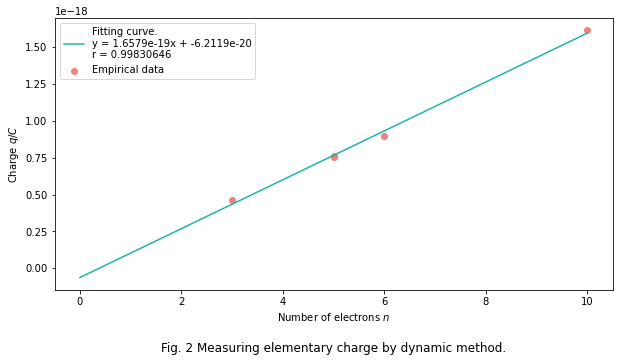

In [5]:
fig = plt.figure(figsize=(10, 5))
e_func = np.polyfit(para_table['round_n'], para_table['q'], deg=1)

n_dns = np.linspace(0, 10, 100)
q_reg = np.polyval(e_func, n_dns)

r = np.corrcoef(para_table['round_n'], para_table['q'])[0,1]

A1, A2 = tuple(e_func)
plt.scatter(para_table['round_n'], para_table['q'], color='lightcoral', label='Empirical data')
plt.plot(n_dns, q_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4e}x + {:.4e}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()

plt.xlabel('Number of electrons $n$')
plt.ylabel('Charge $q/C$')
plt.title('Fig. 2 Measuring elementary charge by dynamic method.', y=-0.25)
plt.savefig(r'C1-Output\fig.2.png', bbox_inches = 'tight', dpi=300)
print((A1-e)/e)